# *Модуль 2*

*Города*

In [1]:
cities = {
    "Arkhangelsk": (64.5393, 40.5170),
    "Moscow": (55.7558, 37.6173),
    "Saint Petersburg": (59.9343, 30.3351),
    "Kazan": (55.7963, 49.1088),
    "Sochi": (43.5855, 39.7231),
    "Novosibirsk": (55.0084, 82.9357),
    "Yekaterinburg": (56.8389, 60.6057),
    "Krasnoyarsk": (56.0153, 92.8932)
}

## *2.2 Сбор данных, используя API*
*Используя API Open-Meteo, получите данные о почасовых показаниях*
*погоды для 8 городов, анализируемых в Модуле 1, за период с 16.01.2024 по*
*19.01.2024. Данные соберите в один набор данных.*
*Сформируйте набор данных о погодных условиях в соответствии с*
*разработанной структурой по всем предоставленным данным.*

*Импорт библиотек*

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Функция получения данных из Open-Meteo*

In [3]:
def fetch_weather(city, lat, lon):
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": "2024-01-16",
        "end_date": "2024-01-19",
        "hourly": [
            "temperature_2m",
            "relative_humidity_2m",
            "surface_pressure",
            "wind_speed_10m",
            "cloud_cover"
        ],
        "timezone": "auto"
    }

    response = requests.get(url, params=params)
    data = response.json()["hourly"]

    df = pd.DataFrame(data)
    df["city"] = city
    df["latitude"] = lat
    df["longitude"] = lon
    return df

*Сбор данных по всем городам*

In [4]:
dfs = []

for city, (lat, lon) in cities.items():
    dfs.append(fetch_weather(city, lat, lon))

df2 = pd.concat(dfs, ignore_index=True)

*Предобработка*

In [5]:
df2["time"] = pd.to_datetime(df2["time"])
df2.dropna(inplace=True)

## *2.3 Визуальный анализ многомерных данных*
*Используя программные средства, визуализируйте зависимости*
*атрибутов в наборе данных. Используйте визуализацию многомерных*
*данных 2 или более способов. Обоснуйте выбранные способы визуализации.*
*Приведите интерпретацию полученным результатам.*
*Сравните данные с данными Модуля 1.*

*Scatter plot (температура vs давление)*

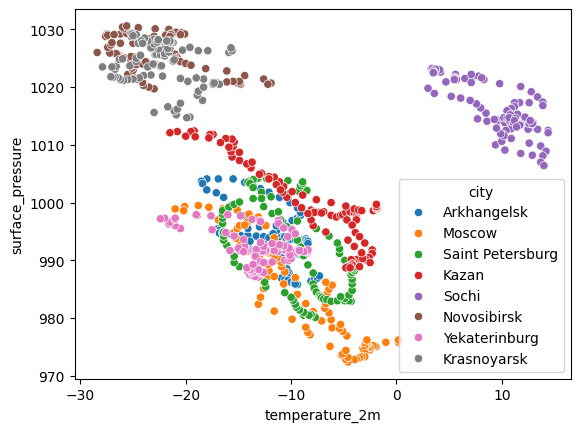

In [6]:
sns.scatterplot(
    data=df2,
    x="temperature_2m",
    y="surface_pressure",
    hue="city"
)
plt.show()

*Позволяет выявить зависимость температуры и давления и различия между городами.*

**Boxplot (температура по городам)**

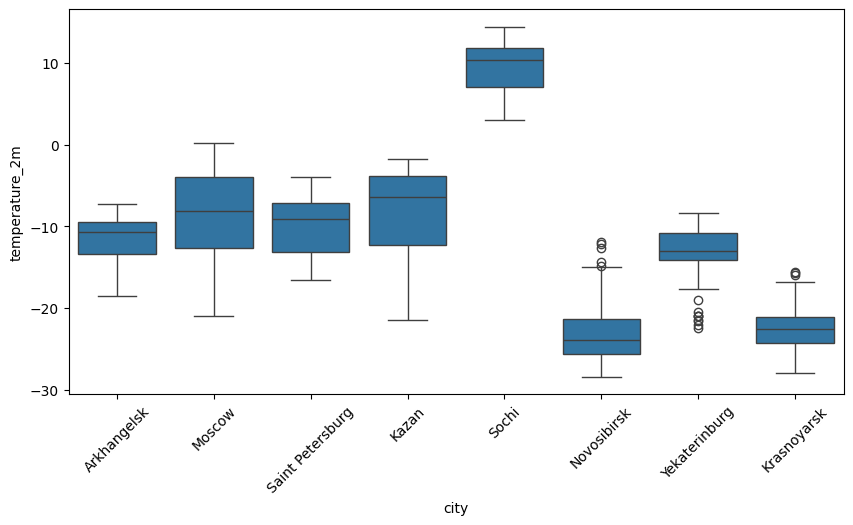

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df2, x="city", y="temperature_2m")
plt.xticks(rotation=45)
plt.show()

*Позволяет сравнить распределения температуры между городами.*

**Pairplot (многомерная визуализация)**

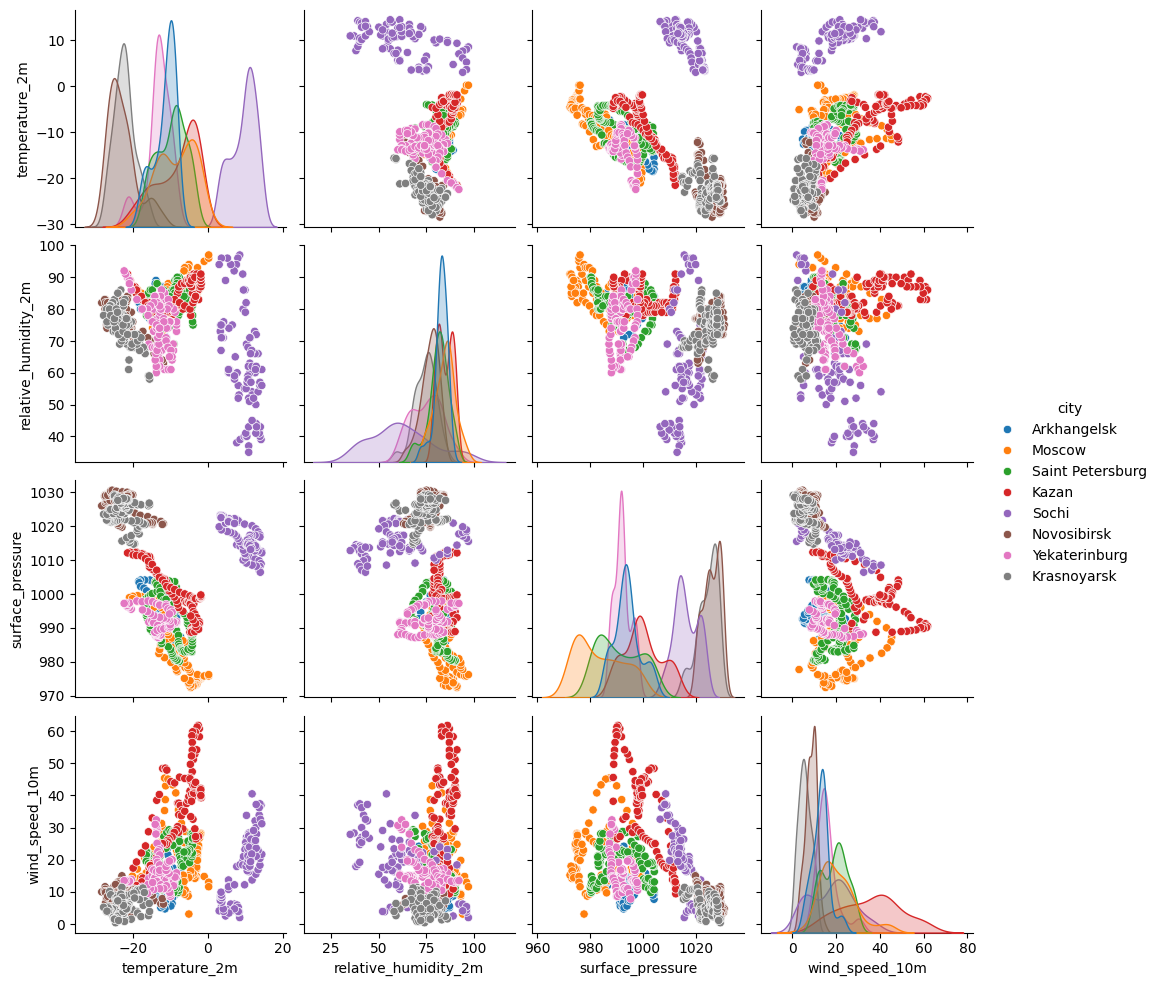

In [8]:
sns.pairplot(
    df2,
    vars=[
        "temperature_2m",
        "relative_humidity_2m",
        "surface_pressure",
        "wind_speed_10m"
    ],
    hue="city"
)
plt.show()

*Позволяет одновременно анализировать несколько параметров и их взаимосвязи.*

*Температурные и барические характеристики, полученные из Open-Meteo, находятся в тех же диапазонах значений, что и данные архива погоды в Модуле 1, что подтверждает согласованность источников данных.*

## **2.4 Подготовка отчета**
**Подготовьте отчет о проделанной работе по итогам модуля, в котором**
**будут представлены результаты, выводы и обоснования выбора по каждому**
**разделу задания. В отчете также опишите содержимое результирующих**
**файлов архива Data.zip**

*Сохранение результатов*

In [9]:
import os

os.makedirs("Data2", exist_ok=True)
df2.to_csv("Data2/weather_open_meteo.csv", index=False)